### Assignment 4 - Space Shuttle Disaster - Linear Regression

In [10]:
#Load the libraries 
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pandas.core import datetools
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

### Description of attributes
###### 1. Number of O-rings at risk on a given flight
###### 2. Number experiencing thermal distress
###### 3. Launch temperature (degrees F)
###### 4. Leak-check pressure (psi)
###### 5. Temporal order of flight

In [11]:
#Load the dataframe
oring_df = pd.read_csv('o-ring-erosion-or-blowby.csv', names = ["Rings", "Distress", "Temperature", "LeakPressure", "Order"])

In [12]:
oring_df.head()

,Rings,Distress,Temperature,LeakPressure,Order
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


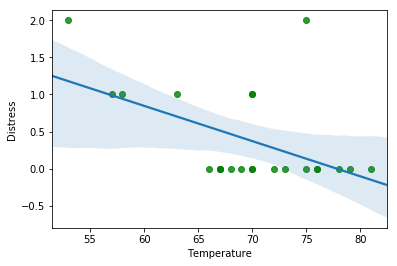

In [13]:
#Regression plot 
sb.regplot(x=oring_df["Temperature"], y=oring_df["Distress"], scatter_kws={"color": "green"});

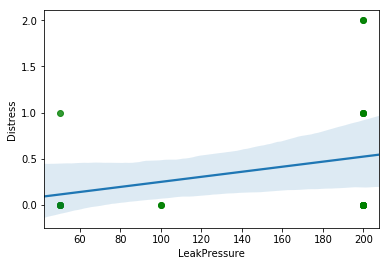

In [14]:
sb.regplot(x=oring_df["LeakPressure"], y=oring_df["Distress"], scatter_kws={"color": "green"});

### Linear Regression using Ordinary Least Squares

In [15]:
#Method 1 statsmodel.formula API- Intercept automatically fitted

from statsmodels.formula.api import ols
model = ols(formula='Distress ~ Temperature + LeakPressure', data=oring_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Distress   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     5.490
Date:                Mon, 16 Jul 2018   Prob (F-statistic):             0.0126
Time:                        20:41:41   Log-Likelihood:                -17.408
No. Observations:                  23   AIC:                             40.82
Df Residuals:                      20   BIC:                             44.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.3298      1.188      2.803      0.011       0.851       5.808
Temperature     -0.0487      0.017     -2.910      0.009      -0.084      -0.014
LeakPressure     0.0029      0.002      1.699      0.105      -0.001       0.007
==============================================================================
Omnibus:                       19.324   Durbin-Watson:                   2.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.471
Skew:                           1.782   Prob(JB):                     8.00e-06
Kurtosis:                       6.433   Cond. No.                     1.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#Method 2 statsmodel.api API- Intercept to be added manually

import statsmodels.api as sm
X = oring_df[["Temperature", "LeakPressure"]]
#Predictor
y = oring_df["Distress"]
#Intercept
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Distress   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     5.490
Date:                Mon, 16 Jul 2018   Prob (F-statistic):             0.0126
Time:                        20:41:47   Log-Likelihood:                -17.408
No. Observations:                  23   AIC:                             40.82
Df Residuals:                      20   BIC:                             44.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.3298      1.188      2.803      0.011       0.851       5.808
Temperature     -0.0487      0.017     -2.910      0.009      -0.084      -0.014
LeakPressure     0.0029      0.002      1.699      0.105      -0.001       0.007
==============================================================================
Omnibus:                       19.324   Durbin-Watson:                   2.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.471
Skew:                           1.782   Prob(JB):                     8.00e-06
Kurtosis:                       6.433   Cond. No.                     1.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#So, distress = a*Temperature + b*Pressure + c ( a and b are coefficients and c is intercept)

c = model.params[0]
a = model.params[1] 
b = model.params[2]

# z = ax + by + c
print ("[Temperature = 31F, Pressure = 0 psi]   => [O-Rings at distress]=", a * 31 + b * 0 + c)
print ("[Temperature = 31F, Pressure = 50 psi]  => [O-Rings at distress]=", a * 31 + b * 50 + c)
print ("[Temperature = 31F, Pressure = 100 psi] => [O-Rings at distress]=", a * 31 + b * 100 + c)
print ("[Temperature = 31F, Pressure = 200 psi] => [O-Rings at distress]=", a * 31 + b * 200 + c)

[Temperature = 31F, Pressure = 0 psi]   => [O-Rings at distress]= 1.8210269508611572
[Temperature = 31F, Pressure = 50 psi]  => [O-Rings at distress]= 1.9679931836796436
[Temperature = 31F, Pressure = 100 psi] => [O-Rings at distress]= 2.11495941649813
[Temperature = 31F, Pressure = 200 psi] => [O-Rings at distress]= 2.4088918821351024


#### Therefore the number of rings at distress will be 2 at temperature of 31F.